# WP 5 Seismology
## Exercises - Strain and Rotation

The Exercises are taken from https://wolke.geophysik.uni-muenchen.de/s/FLn68bw4y4T9d3x?path=%2F01_strain.

### 1
1. Split the deformation tensor $\epsilon_{ij}$ into one part that is pure shear (no volume change) and into one part that is pure volume change. Show using Gauss’ Law that the relative volume change is $\epsilon_{ii}$ (follow lecture).

The deformation tensor represents the **symmetric** part within the relation between deformation and displacement in linear elasticity.
\begin{equation}
\epsilon_{ij} = \frac{1}{2} ( \frac{\partial u_i}{\partial x_j} + \frac{\partial u_j}{\partial x_i})
\end{equation}

Since we know that for example
\begin{equation}
\frac{\partial u_y}{\partial x} = \partial_x u_y
\end{equation}

We can rewrite the strain tensor (note the symmetry) as
$$\epsilon_{ij} = \begin{pmatrix}
\partial_x u_x & \frac{1}{2} (\partial_x u_y + \partial_y u_x) & \frac{1}{2} (\partial_x u_z + \partial_z u_x) \\
\frac{1}{2} (\partial_x u_y + \partial_y u_x) & \partial_y u_y & \frac{1}{2} (\partial_y u_z + \partial_z u_y) \\
\frac{1}{2} (\partial_x u_z + \partial_z u_x) & \frac{1}{2} (\partial_y u_z + \partial_z u_y) & \partial_z u_z \\
\end{pmatrix}$$

and split it into one part that is pure shear (off-diagonal elements representing no volume change)
$$\epsilon_{ij,Shear} = \begin{pmatrix}
0 & \frac{1}{2} (\partial_x u_y + \partial_y u_x) & \frac{1}{2} (\partial_x u_z + \partial_z u_x) \\
\frac{1}{2} (\partial_x u_y + \partial_y u_x) & 0 & \frac{1}{2} (\partial_y u_z + \partial_z u_y) \\
\frac{1}{2} (\partial_x u_z + \partial_z u_x) & \frac{1}{2} (\partial_y u_z + \partial_z u_y) & 0 \\
\end{pmatrix}$$

and into one part that is pure volume change (diagonal components)
$$\epsilon_{ij,Volume} = \begin{pmatrix}
\partial_x u_x & 0 & 0 \\
0 & \partial_y u_y & 0 \\
0 & 0 & \partial_z u_z \\
\end{pmatrix}$$

Consider now volume change. We know that
\begin{equation}
\Delta V = \int_V \nabla \cdot \vec{u} \, dV
\end{equation}

Now divide both sides through the volume V
\begin{equation}
\frac{\Delta V}{V} = \frac{1}{V} \int_V \nabla \cdot \vec{u} \, dV
\end{equation}

Apply the limes for V towards zero
\begin{equation}
\lim_{V \to 0} \frac{\Delta V}{V} = \Theta = \epsilon_{ii}
\end{equation}

We can apply the divergence operator on the displacement u and we obtain a curl-free part (P-waves)
\begin{equation}
\Theta = \nabla \cdot \vec{u} = \frac{\partial u_1}{\partial x_1} + \frac{\partial u_2}{\partial x_2} + \frac{\partial u_3}{\partial x_3} = \epsilon_{11} + \epsilon_{22} + \epsilon_{33} = \epsilon_{ii}
\end{equation}

### 2
2. The interior of a volcano deforms in three directions (N,E,Z) by $\Delta u$
	= (0.3, -0.1, 0.4) m for a hexahedral body of side length (1.5km,
	3.3km, 3km). Calculate the elements of the corresponding strain
	inside the body.2. 

In [3]:
import numpy as np

deformation = [0.3, -0.1, 0.4] # m
length = [1.5, 3.3, 3] # km

length = 1000 * np.array(length)
print("Length in km: {}".format(length))

Length in km: [1500. 3300. 3000.]


In [2]:
def calculate_strain_tensor3D(du, u):
    e11 = du[0] / u[0]
    e12 = 0.5 * (du[0] / u[1] + du[1] / u[0])
    e13 = 0.5 * (du[0] / u[2] + du[2] / u[0])
    
    e21 = e12
    e22 = du[1] / u[1]
    e23 = 0.5 * (du[1] / u[2] + du[2] / u[1])

    e31 = e13
    e32 = e23
    e33 = du[2] / u[2]
    
    print("Strain tensor:\n{:06f}\t{:06f}\t{:06f}\n{:06f}\t{:06f}\t{:06f}\n{:06f}\t{:06f}\t{:06f}\n"
         .format(e11, e12, e13, e21, e22, e23, e31, e32, e33))

In [3]:
calculate_strain_tensor3D(deformation, length)

Strain tensor:
0.000200	0.000012	0.000183
0.000012	-0.000030	0.000044
0.000183	0.000044	0.000133



**BUT**, the strain tensor above is wrong!

Why?
- note that there exists no dependencies of the deformation on the other variables
- $\partial_x u_y = \frac{\partial u_y}{\partial x} = \frac{\partial u_x}{\partial y} = \frac{\partial u_x}{\partial z} = \frac{\partial u_z}{\partial x} = \frac{\partial u_y}{\partial z} = \frac{\partial u_z}{\partial y} = 0$ 

### 3
3. Write a Jupyter notebook that calculates the action of an arbitrary strain field in 2D (tensor) on a vector and visualize the result. Define vectors a and b and calculate with vector operations the area of the parallelogram it spans. Quantify the area change due to the strain field.

Help: use [quiver](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)

In [10]:
import matplotlib.pyplot as plt

a = [2 0], b = [1 1]
Random strain field:
 [[0 1]
 [2 3]]
Area before strain: 2
Area after strain: 4


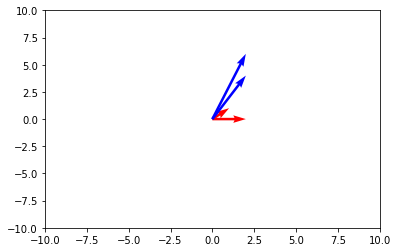

In [7]:
# arbitrary vectors
a = np.random.randint(0,4,2)
b = np.random.randint(0,4,2)
print("a = {}, b = {}".format(a,b))

# arbitrary strain field
arr = np.random.randint(0,4,4)
strain2D = np.reshape(arr, (2,2))
print("Random strain field:\n {}".format(strain2D))

# Area prior deformation
area_prior = abs(np.cross(a,b))
print("Area before strain: {}".format(area_prior))

# Deformation w.r.t vectors (slide 17)
a2 =  strain2D @ a
b2 =  strain2D @ b

# Area post deformation
a_post =  a + strain2D @ a
b_post =  b + strain2D @ b
area_post = abs(np.cross(a_post,b_post))
print("Area after strain: {}".format(area_post))

# Plot
fig, ax = plt.subplots()

# origin
tail = [[0, 0, 0, 0], [0, 0, 0, 0]]

ax.quiver(*tail,
          [a[0], b[0], a_post[0], b_post[0]],
          [a[1], b[1], a_post[1], b_post[1]],
          color=['r', 'r', 'b', 'b'],
          angles='xy', scale_units='xy', scale=1)
#ax.axis([min(min(a),min(b),min(a_post),min(b_post)),max(max(a),max(b),max(a_post),max(b_post)),min(min(a),min(b),min(a_post),min(b_post)),max(max(a),max(b),max(a_post),max(b_post))])
ax.axis([-10,10, -10,10])
plt.show()

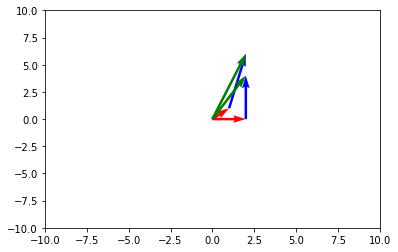

In [8]:
# Plot - add vector from Slide 17
fig, ax = plt.subplots()

# adjusted origin
tail = [[0, 0, a[0], b[0], 0, 0], [0, 0, a[1], b[1], 0, 0]]

ax.quiver(*tail,
          [a[0], b[0], a2[0], b2[0], a_post[0], b_post[0]],
          [a[1], b[1], a2[1], b2[1], a_post[1], b_post[1]],
          color=['r', 'r', 'b', 'b', 'g', 'g'],
          angles='xy', scale_units='xy', scale=1)
#ax.axis([min(min(a),min(b),min(a_post),min(b_post)),max(max(a),max(b),max(a_post),max(b_post)),min(min(a),min(b),min(a_post),min(b_post)),max(max(a),max(b),max(a_post),max(b_post))])
ax.axis([-10,10, -10,10])
plt.show()

### 4 
4. Using the results from the previous notebook compare for appropriate strain
	tensors the length change (before deformation after deformation)
	using vector operations (exact) and the linearization (l0
	is length of y, l is length of y after deformation).

In [8]:
#y = np.random.randint(0,4,2)
#print("y = {}".format(y))
#
## arbitrary strain field
#arr = np.random.randint(0,4,4)
#strain2D = np.reshape(arr, (2,2))
##strain2D = 1e-7 * np.array(strain2D)
#print("Random strain field:\n {}".format(strain2D))

# from Nico
y = np.array([1,0])
strain2D = np.array(([1,2], [2,3])) #* 1e-6
print("y = {}".format(y))
print("Random strain field:\n {}".format(strain2D))


# post deformation - vector operation
y_post = y + strain2D @ y
print("y_post = {}".format(y_post))


print(f"Length of y prior: {np.linalg.norm(y)}")
print(f"Length of y post (vector operation): {np.linalg.norm(y_post)}")
print(f"Relative length change (exact): {(np.linalg.norm(y_post) - np.linalg.norm(y)) / np.linalg.norm(y)}")

# post deformation - linearization (slide 22)
rlc = 0 # initialize relative length change
for i in range(2):
    for j in range(2):
        rlc = rlc + strain2D[i,j] * y[i] * y[j] / (np.linalg.norm(y)**2)
#rlc = rlc / (np.linalg.norm(y)**2)

print(f"Relative length change (linearization): {rlc}")

y = [1 0]
Random strain field:
 [[1 2]
 [2 3]]
y_post = [2 2]
Length of y prior: 1.0
Length of y post (vector operation): 2.8284271247461903
Relative length change (exact): 1.8284271247461903
Relative length change (linearization): 1.0


### 5 old.
5. What is the action of $\xi_{ij}$ - the antisymmetric part of the gradient - on vector y? Write a Jupyter notebook to calculate, quantify, and visualize that action.

The rotation tensor represents the **anti-symmetric** part within the relation between deformation and displacement in linear elasticity.
\begin{equation}
\xi{ij} = \frac{1}{2} ( \frac{\partial u_i}{\partial x_j} - \frac{\partial u_j}{\partial x_i})
\end{equation}

and can be written in 3D as follows:
$$\xi{ij} = \begin{pmatrix}
0 & \xi{12} & \xi{13} \\
-\xi{12} & 0 & \xi{23} \\
-\xi{13} & -\xi{23} & 0 \\
\end{pmatrix}$$

Furthermore it exists the following equation for a rigid body rotation:
\begin{equation}
\vec{\xi} \times \vec{y}
\end{equation}

xi = 
[[ 0  1]
 [-1  0]]
y = [1 0]
Action = [-1  0]


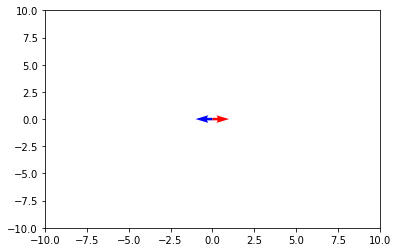

In [11]:
# Assume 2D only and the folllowing rotation tensor
xi = np.array(([0,1], [-1,0]))
print("xi = \n{}".format(xi))

# y comes from Exercise 4
print("y = {}".format(y))

# Calculate action
action = np.cross(xi,y)
#action = y + xi @ y
# Which of these ones to use?
print("Action = {}".format(action))

# Plot action
fig, ax = plt.subplots()

# origin
tail = [[0, 0], [0, 0]]

ax.quiver(*tail,
          [y[0], action[0]],
          [y[1], action[1]],
          color=['r', 'b'],
          angles='xy', scale_units='xy', scale=1)
ax.axis([-10,10, -10,10])
plt.show()

double check result above!!

y2 = y + rot_2d @ y  ??

### 5. new
5. A coordinate system is defined such that x-E, y-N, z-vertical. A plane shear wave is propagating horizontally at an angle of 10°  (counterclockwise) w.r.t. the x-axis.  The amplitude is 1nm, the frequency is 0.1Hz and the phase velocity is 4km/s. Formulate a sinusoidal displacement field u and its gradient components 𝜕𝑗𝑢𝑖. Derive the elements of the strain and rotation tensors. What is the action of the rotation tensor on an arbitrary vector inside the medium? Hint: You can also formulate it generally in terms of amplitudes, propagation direction etc in a Jupyter notebook. It might also be interesting to show the motions of all (non-zero) displacement, strain, and rotation components.

In [5]:
alpha = 10
A = 1e-9
f = 0.1 
T = 1/f
c = 4000 

In [6]:
angle = alpha * 2 * np.pi / 360 # in rad
k = (c/f) * np.array ([np.cos(angle), np.sin(angle), 0])

t = np.linspace(0,100,1000)

u = A * np.sin(np.dot(k*x) - 2*np.pi*f*t)

NameError: name 'x' is not defined

### 6.
6. Derive the equations for strain and rotation tensors from the formulation of the wavefield gradient.

### 7.
7. The motion of Rayleigh waves in a homogeneous halfspace can be described by (c is phase velocity, k is wavenumber)

### 8. 
8. The free surface condition implies that

\begin{equation}
\sigma_{i3} = 0 \ \ (i = x,y,z)
\end{equation}

implies that
\begin{equation}
\frac{\partial u_x}{\partial x_z} = - \frac{\partial u_z}{\partial x_x} \ ; \ \frac{\partial u_y}{\partial x_z} = - \frac{\partial u_z}{\partial x_y} \ ; \ \frac{\partial u_z}{\partial x_z} = - \frac{\lambda}{\lambda + 2 \mu} \cdot (\frac{\partial u_x}{\partial x_x} + \frac{\partial u_y}{\partial x_y})
\end{equation}

Assuming and isotropic stress-strain relation
\begin{equation}
\sigma_{ij} = \lambda \epsilon_{kk} \delta_{ij} + 2\mu \epsilon_{ij}
\end{equation}

Show that this implies at the free surface (geometrical meaning?)
\begin{equation}
\omega_x = \frac{\partial u_z}{\partial x_y} \ ; \ \omega_y = - \frac{\partial u_z}{\partial x_x}
\end{equation}


*Solution:*
We know that for rotation
\begin{equation}
\vec{\omega} = \frac{1}{2} \nabla \cdot \vec{u}
\end{equation}


\begin{equation}
\Rightarrow \omega_x = (\frac{1}{2} \nabla \cdot u)_{x} = \frac{1}{2} (\partial x_y u_z - \partial x_z u_y) = \frac{1}{2} (\frac{\partial u_z}{\partial x_y} - \frac{\partial u_y}{\partial x_z} ) = \frac{1}{2} (\frac{\partial u_z}{\partial x_y} - - \frac{\partial u_z}{\partial x_y}) = \frac{\partial u_z}{\partial x_y}
\end{equation}

and 
\begin{equation}
\Rightarrow \omega_y = (\frac{1}{2} \nabla \cdot u)_{y} = \frac{1}{2} (\partial x_z u_x - \partial x_x u_z) = \frac{1}{2} (\frac{\partial u_x}{\partial x_z} - \frac{\partial u_z}{\partial x_x} ) = \frac{1}{2} (- \frac{\partial u_z}{\partial x_x} - \frac{\partial u_z}{\partial x_x}) = - \frac{\partial u_z}{\partial x_x}
\end{equation}

## Comprehensive questions
### 9.
What could be the reason why array-derived strain or rotation and directly measured strain or rotation are rarely the same (but very close)? What information could be contained in the differential observation?

- slide 32: eta?
- local heterogeneities because arrays measure an average over certain area
- rotation/ strain measurement are point measurement
- **size of array**
    - too large: bad estimate of gradient
    - too small: difference between signals gets too small so that you get noise
    - optimal size for array derived properties 
- measurement errors
- instruments themselves (orientation, tilt and perhaps coupling could be a problem)
- signal-to-noise ratio could be different from instrument to instrument 
- instrument correction could be problematic (wrong correction leads to phase errors)
- phase error big problem since we take difference of observations
- differential observation: higher near receiver sensitivity
- **heterogeneity**
    - local heterogeneity in array plays an important role
- **instument problems**

Information obtained:
- assuming information/ observations are correct, then the difference gives us information about local heterogeneities



### 10.
Normally three seismometer locations are required to determine the location of an earthquake in an elastic half space. Explain why – in principle – one 6-C (translation and rotation) record  may be enough to locate an earthquake (assume that you record both surface waves and body waves. 

- three seismometer: triangulation (draw circels and determine epicentre)
- derive angle (backaziuth) from single station measuremnet
- incident angle of incoming wave reuired + 1D velocity model the distance can be determined
- 6C inclduead additional degrees of freedem (tradiational seismometer has less)
- 6C sensor: surface waves are observed --> we get 1D velocity model (but, it is primariliy shear-velocity)
- assume you have vp/ vs ratio $\sqrt(3)$
- assume you also have P-wave velcoity
- assuming homogeneous medium (or if layering is known): you know distance and velocity and shot it back
- from amplitude ratio you get phase velocity
- @hongyi: distance

### 11.
Explain why the joint observation of rotation (strain) and translation has a strong near-receiver sensitivity. What are potential applications?

- slide 54
- kernels vanish at source
- intuitively it makes sense
- difference vs ratio ??? 
- DAS, blueSeis --> local tomography with gradient measurements (traveltimes & source baasically irrelevant) --> only sensitive to local strucute, not source structure
- plane/ bird view (sorce bootm left, rceiver top right)
- **inference of information of local heterogeneities near the receiver (high sensitivity)**

### 12.
As you know standard seismometer records have permanent signals generate in the oceans. Do you expect those signals also to appear on all rotation sensors components? Give reasons. 

- **Oceans mainly produce Rayleigh waves** and rotation sensors mainly record SH waves (in theory not visable)
- Due to scattering lots of ocean generated noise is converted to Love waves and is recorded
- (SH waves on vertical rotation component)
- **Why do the oceans primarily Rayleigh waves: pressure signal is translated into vertical motion at seafloor**

### 13. 
What do you think is more reliable in seismology: measurements of travel times (phase) or absolute amplitudes (as used to estimate ratios of strain/rotation and translations)

- measurement of travel times in the classical sense
- for banana-doughnet kerneks: traveltimes can irrelevalnt (example of borehole measurments)
- but for correlation coeff: it's independent of amplitude 
- **Traveltimes and phase measurement are much more stable** even though more ambiguous
- Amplitudes usually not used for Full-Waveform Inversion --> but due to improved stations make more use of amplitudes to constrain structure
- Arival time differences contain information about interior properties


### 14.
DAS (distributed acoustic sensing) allows measuring along-cable strains. Is it possible to distinguish shear and P waves?
- DAS can only measure longitudtina lstrains, thus P-waves?
- one can distuingish!
- one might need more than one cable to distuinginh

- Depends on configuration of DAS cable, but it should be possible

- Amplitude in DAS recording is uncertain!
